## Linear regression model without using any library

In [7]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# create a dummy dataset
def generate_examples(num=1000):
    W = [4.0, 3.0]
    b = 1.0
    
    W = np.reshape(W, (2, 1))
    
    X = np.random.randn(num, 2)
    Y = b + np.dot(X, W) + np.random.randn()
    
    Y = np.reshape(Y, (num, 1))
    
    return X, Y

In [51]:
# create the data 
X, Y = generate_examples() 

In [54]:
# shape of the data
print(X.shape)
print(Y.shape)

(1000, 2)
(1000, 1)


In [52]:
# taking each columns
col1 = X[: , :1]
col2 = X[: , 1:2]

Text(0.5, 1.0, 'column 2 VS Y')

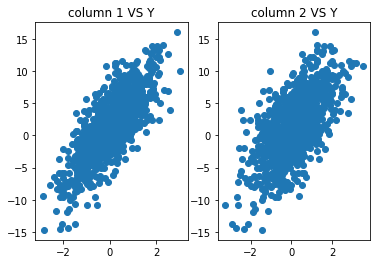

In [53]:
#plotting each colums and seeing the relationship with y
ax =plt.subplot(1,2,1)
plt.scatter(col1,Y)
plt.title('column 1 VS Y')
ax =plt.subplot(1,2,2)
plt.scatter(col2,Y)
plt.title('column 2 VS Y')

In [55]:
# Linear Regression model using  numpy
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
        
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y
    
    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])
    
    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db
    
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db
        
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % 10 == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses
    
    def predict(self,X):
        y_hat = self.forward_pass(X)
        return y_hat

In [58]:
#splitting the data into traning and testing data with jst simple slicing technique
x_train,y_train,x_test,y_test = X[:800,:],Y[:800,:],X[800:,:],Y[800:,:]

In [59]:
# seeing the shape of splitted data
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(800, 2) (800, 1)
(200, 2) (200, 1)


Iter: 0, Current loss: 11.0539
Iter: 10, Current loss: 9.1494
Iter: 20, Current loss: 7.5753
Iter: 30, Current loss: 6.2740
Iter: 40, Current loss: 5.1977
Iter: 50, Current loss: 4.3073
Iter: 60, Current loss: 3.5705
Iter: 70, Current loss: 2.9605
Iter: 80, Current loss: 2.4553
Iter: 90, Current loss: 2.0369
Iter: 100, Current loss: 1.6902
Iter: 110, Current loss: 1.4029
Iter: 120, Current loss: 1.1646
Iter: 130, Current loss: 0.9671
Iter: 140, Current loss: 0.8032
Iter: 150, Current loss: 0.6673
Iter: 160, Current loss: 0.5544
Iter: 170, Current loss: 0.4608
Iter: 180, Current loss: 0.3830
Iter: 190, Current loss: 0.3184
Iter: 200, Current loss: 0.2648
Iter: 210, Current loss: 0.2202
Iter: 220, Current loss: 0.1832
Iter: 230, Current loss: 0.1524
Iter: 240, Current loss: 0.1268
Iter: 250, Current loss: 0.1055
Iter: 260, Current loss: 0.0878
Iter: 270, Current loss: 0.0731
Iter: 280, Current loss: 0.0609
Iter: 290, Current loss: 0.0507
Iter: 300, Current loss: 0.0422
Iter: 310, Current

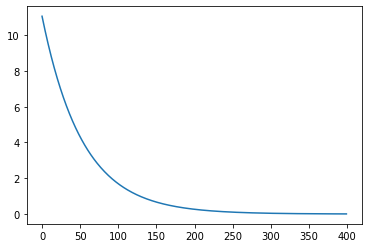

In [65]:
# traning the model calculating the loss
model = Model(2)
losses = model.train(x_train, y_train, 400, 0.01)
plt.plot(range(400), losses);

In [66]:
# Calculatin the r2_score on testing data
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test)) * 100

99.93833314112895